1. Nhập thư viện và dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('.\Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Mô tả dữ liệu  
CustomerID: ID duy nhất được chỉ định cho khách hàng  
Gender: Giới tính của khách hàng  
Age: Tuổi của khách hàng  
Annual Income (k$): Thu nhập hàng năm của khách hàng  
Spending Score (1-100): Điểm do trung tâm mua sắm chỉ định dựa trên hành vi và tính chất chi tiêu của khách hàng 

In [3]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Thu nhập hàng năm và Điểm chi tiêu
X = data.iloc[:, [3, 4]].values

2. Tìm số cụm tối ưu

Inertia_ tương đương với Sum of Squared Errors (SSE), tức là tổng bình phương khoảng cách giữa các điểm dữ liệu và trung tâm cluster gần nhất của chúng. Khi sử dụng phương pháp KMeans để phân cụm, mục tiêu của chúng ta là tìm cách giảm giá trị của inertia_ đến mức tối thiểu bằng cách tìm ra các trung tâm cluster tối ưu cho dữ liệu đầu vào.

In [5]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto')
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

data = [go.Scatter(x=list(range(1,11)), y=sse, mode='lines')]
layout = go.Layout(title='Elbow Curve', xaxis=dict(title='Number of Clusters'),
                   yaxis=dict(title='SSD'))

fig = go.Figure(data=data, layout=layout)
fig.show()

C:\Users\Windows 11\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Windows 11\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Windows 11\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Windows 11\AppData\Roaming\Python\Python39\site-packages\s

Để tìm số lượng cụm tối ưu, nơi SSE bắt đầu chững lại.  
Trong trường hợp này, có vẻ như số lượng cụm tối ưu là khoảng 5

3. Huấn luyện thuật toán K-means trên tập dữ liệu huấn luyện.

In [6]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X) 

C:\Users\Windows 11\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Windows 11\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



4. Visualize the Clusters. Since this model has five clusters, we need to visualize each one.

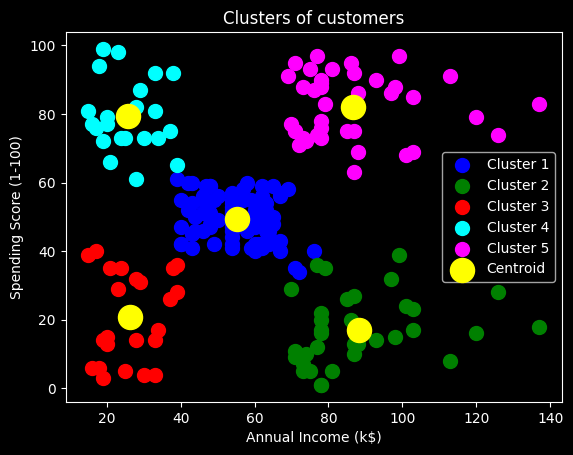

In [7]:
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') 
plt.scatter(X[y_predict== 2, 0], X[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()
plt.show()  